# Project 1
## Part 1: Data scraping and preparation

In [3]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

## I use requests to get top 50 solar flares data from the mentioned url. I extract the text and then use beautifulsoup to read and parse data as html and use pprettify to show the text.


In [4]:
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
r = requests.get(url)
text = r.text
soup = BeautifulSoup(text,"html5lib")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Real-time, aurora community, solar wind, Kp index, kiruna, EPAM, DSCVR, aurora borealis, aurora, aurora australis, northern lights, data plots, proton flux monitor, solar activity, solar flares, sunspots, aurora alert, warnings, Sun, Space Weather, SDO, Stereo, SpaceWeatherUpdates, SpaceWeatherUpdate, Space Weather update" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://poollicht.be/en/solar-activity/top-50-solar-flares" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 50 solar flares | Solar activity" property=

## Here I use find to find the table in the text and class of the table we are looking for is "table table-striped". 

In [5]:
table=soup.find("table", class_="table table-striped")

In [6]:
table

<table class="table table-striped">
        <thead>
            <tr>
                <th></th>
                <th></th>
                <th></th>
                <th>Region</th>
                <th>Start</th>
                <th>Maximum</th>
                <th>End</th>
                <th></th>
        </tr></thead><tbody><tr><td>1</td><td><span class="flare_small Xclass">X28.0</span></td><td>2003/11/04</td><td><span class="badge badge-region_mag BGD"><a href="/en/solar-activity/region/10486">0486</a></span></td><td>19:29</td><td>19:53</td><td>20:06</td><td><a class="btn btn-xs btn-default html5lightbox" href="/images/Archief/2003/Flares/200311041953X28.0.mp4"><i aria-hidden="true" class="fa fa-play-circle"></i> Movie</a><a class="btn btn-xs btn-default" href="/en/archive/2003/11/04/xray">View archive</a></td></tr><tr><td>2</td><td><span class="flare_small Xclass">X20.0</span></td><td>2001/04/02</td><td><span class="badge badge-region_mag BGD"><a href="/en/solar-activity/region/9393"

## Here I find all the rows and then all the information in each row and append them to make a list. Then I reshape the list because I know the data should be in the format of 50*8.

In [7]:
tr_tags = table.find_all('tr')
list_of_data=[]
for tr in tr_tags:
    
    td_tags = tr.find_all('td')

    for td in td_tags:
        list_of_data.append(td.string)
  

In [8]:
array_of_data=np.array(list_of_data).reshape(50,8)
array_of_data

array([['1', 'X28.0', '2003/11/04', '0486', '19:29', '19:53', '20:06', None],
       ['2', 'X20.0', '2001/04/02', '9393', '21:32', '21:51', '22:03', None],
       ['3', 'X17.2', '2003/10/28', '0486', '09:51', '11:10', '11:24', None],
       ['4', 'X17.0', '2005/09/07', '0808', '17:17', '17:40', '18:03', None],
       ['5', 'X14.4', '2001/04/15', '9415', '13:19', '13:50', '13:55', None],
       ['6', 'X10.0', '2003/10/29', '0486', '20:37', '20:49', '21:01', None],
       ['7', 'X9.4', '1997/11/06', '8100', '11:49', '11:55', '12:01', None],
       ['8', 'X9.3', '2017/09/06', '2673', '11:53', '12:02', '12:10',
        'View archive'],
       ['9', 'X9.0', '2006/12/05', '0930', '10:18', '10:35', '10:45', None],
       ['10', 'X8.3', '2003/11/02', '0486', '17:03', '17:25', '17:39', None],
       ['11', 'X8.2', '2017/09/10', '2673', '15:35', '16:06', '16:31',
        'View archive'],
       ['12', 'X7.1', '2005/01/20', '0720', '06:36', '07:01', '07:26', None],
       ['13', 'X6.9', '2011/08/

## Here I save the data as data frame and set the columns' names.

In [9]:
df=pd.DataFrame(array_of_data,columns=['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie'])
df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28.0,2003/11/04,0486,19:29,19:53,20:06,None
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,None
2,3,X17.2,2003/10/28,0486,09:51,11:10,11:24,None
3,4,X17.0,2005/09/07,0808,17:17,17:40,18:03,None
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,None
5,6,X10.0,2003/10/29,0486,20:37,20:49,21:01,None
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,None
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,View archive
8,9,X9.0,2006/12/05,0930,10:18,10:35,10:45,None
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,None


## Step 2: Tidy the top 50 solar flare data
## Here I delete the movie column and use inplace to change the dataframe.

In [10]:
df.drop('movie',axis=1,inplace=True)
df

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28.0,2003/11/04,0486,19:29,19:53,20:06
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2,2003/10/28,0486,09:51,11:10,11:24
3,4,X17.0,2005/09/07,0808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10.0,2003/10/29,0486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9.0,2006/12/05,0930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39


## Here I use .to_datetime method to change the format of date and time columns and make new columns which are in the datetime format. Then I delete the date and times columns.

In [11]:
import datetime
df['start_datetime'] = pd.to_datetime(df['date'] + " " + df['start_time'])
df['max_datetime'] = pd.to_datetime(df['date'] + " " + df['maximum_time'])
df['end_datetime'] = pd.to_datetime(df['date'] + " " + df['end_time'])


In [12]:
df.drop(['date','start_time','maximum_time','end_time'],axis=1,inplace=True)
df

,rank,x_classification,region,start_datetime,max_datetime,end_datetime
0,1,X28.0,0486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,0486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,0808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10.0,0486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9.0,0930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,0486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


## Here I replace the '-' data in region column to np.nan and then rearrange the location of the columns based on the desired output.

In [13]:
df['region'].replace({"-":np.nan}, inplace=True)
df=df[['rank','x_classification','start_datetime','max_datetime','end_datetime','region']]
df

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


## Step 3: Scrape the NASA data
## Here I use requests to get data from url and then use beautifulsoup to read and parse data as html. Then use prettify to show the data.

In [14]:
url_NASA = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
r = requests.get(url_NASA)
text = r.text
text
soup = BeautifulSoup(text,"html.parser")
print(soup.prettify())

<html>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="http://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="http://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a h

## Then I use gettext method to just save the text and then split the text at each row so this way we have each row separately. Then I looked at the data and saw that the data we are interested in are from row 15 to row -4. Then I just these rows to form the table rows.

In [15]:
page_text=soup.getText()
page_rows=page_text.split('\n')
page_rows

['',
 'Wind/WAVES type II bursts and CMEs',
 'A Brief Description',
 '',
 'NOTE: List includes DH type II bursts observed by Wind spacecraft, ',
 'but after STEREO launch on Oct 2006 the start and end times and ',
 'frequencies of bursts are determined using both Wind and STEREO ',
 'observations',
 '',
 '=================================================================================================',
 '                DH Type II                       Flare                     CME                   ',
 '----------------------------------------   -----------------   --------------------------   Plots',
 'Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        ',
 '(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) ',
 '=================================================================================================',
 '1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74  

In [16]:
table_rows=page_rows[15:-4]
table_rows

['1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX',
 '1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX',
 '1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX',
 '1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX',
 '1997/11/06 12:20 11/07 08:30 14000   100   S18W63  8100 X9.4   11/06 12:10 Halo  360 1556   PHTX',
 '1997/11/27 13:30 11/27 14:00 14000  7000   N17E63  8113 X2.6   11/27 13:56   98   91  441

## Then by looking at the data we can see that we are interested in 14 columns, so the next section is appending the data for each row and then make a data frame based on the data and define the columns' names.

In [17]:
array_of_rows=[]
for i in range(len(table_rows)):
    data_split=table_rows[i].split()[0:14]
    array_of_rows.append(data_split)
    
    
columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_importance', 'cme_date' , 'cme_time' , 'cme_angle' , 'cme_width' , 'cme_speed']  
df_NASA=pd.DataFrame(array_of_rows,columns=columns)


## Step 4: Tidy the NASA table
## By looking at the data description and also looking at the data I found the format of missing data in each column and in this section I am replacing them with np.nan and then save the results in csv file to check.

In [18]:
df_NASA.replace({"????":np.nan}, inplace=True)
df_NASA.replace({"---":np.nan}, inplace=True)
df_NASA.replace({"----":np.nan}, inplace=True)
df_NASA.replace({"-----":np.nan}, inplace=True)
df_NASA.replace({"------":np.nan}, inplace=True)
df_NASA.replace({"--/--":np.nan}, inplace=True)
df_NASA.replace({"--:--":np.nan}, inplace=True)
df_NASA.to_csv('test1.csv')


## Here I create a column that if the "cme_angle" is "Halo" it is True and False otherwise and then I replace "Halo" with np.nan.

In [19]:
df_NASA["is_halo"]= df_NASA["cme_angle"]=="Halo"
df_NASA['cme_angle'].replace({"Halo":np.nan}, inplace=True)


## Here I add a column that indicates whether the "cme_width" column is a lower bound or not. First I read the "cme_width" column as string type and then with a map lambda function I check to see whether there is ">" in the data or not. Then I extract only the numbers from "cme_width" column and this way ">" sign is removed from the data.

In [20]:
df_NASA['width_lower_bound'] = df_NASA['cme_width'].astype(str).map(lambda x: '>' in x)
import re 
df_NASA['cme_width'] = df_NASA['cme_width'].str.extract('(\d+)', expand=False)

## Here I am combining date and time columns for start, end and cme so they can be encoded as datetime objects. Start_datetime is easy because the "start_date" has year in it. So I just add date and time and use to_datetime method. For the other two the dates don't have the year. That's why I am first changing the start_date format to datetime and then extract year from that. Then use the map lambda function to extract month, day, hour and minute and then use pd.to_datetime to change them to end_time.  The secret is that the columns should be exactly called year,month,day,hour and minute. Thats why I have to first delete these columns and again make the new ones for "cme_datetime".

In [21]:
import datetime
df_NASA['start_datetime'] = pd.to_datetime(df_NASA['start_date'] + " " + df_NASA['start_time'])
df_NASA['start_date'] = pd.to_datetime(df_NASA['start_date'])
df_NASA['year'] = df_NASA['start_date'].dt.year
df_NASA['month'] = df_NASA['end_date'].astype(str).map(lambda x: x[0:2])
df_NASA['day'] = df_NASA['end_date'].astype(str).map(lambda x: x[3:5])
df_NASA['hour'] = df_NASA['end_time'].astype(str).map(lambda x: x[0:2])
df_NASA['minute'] = df_NASA['end_time'].astype(str).map(lambda x: x[3:5])
df_NASA['end_datetime']=pd.to_datetime(df_NASA[['year', 'month', 'day', 'hour', 'minute']])
df_NASA.drop(['month','day','hour','minute'],axis=1,inplace=True)


In [22]:
df_NASA['month'] = df_NASA['cme_date'].astype(str).map(lambda x: x[0:2] )
df_NASA['day'] = df_NASA['cme_date'].astype(str).map(lambda x: x[3:5] )
df_NASA['hour'] = df_NASA['cme_time'].astype(str).map(lambda x: x[0:2] )
df_NASA['minute'] = df_NASA['cme_time'].astype(str).map(lambda x: x[3:5] )
df_NASA.replace({"na":np.nan}, inplace=True)
df_NASA['cme_datetime']=pd.to_datetime(df_NASA[['year', 'month', 'day', 'hour', 'minute']])


## Here I just keep the columns I need for the dataframe and save the data to csv file to check.

In [23]:
df_NASA=df_NASA[['start_datetime',  'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_importance',  'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed',   'is_halo', 'width_lower_bound']]
df_NASA.to_csv('test2.csv')
df_NASA

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


# Part 2: Analysis
## Question 1: Replication

## Here I first tried to sort the dataframe based on flare_importance but it's not working the way we want. The format is text and so for example X9.4 is considered higher than X28. That's why I added two columns; sort1 and sort2. I extracted the number part of the flare importance column as float and put it in the sort1 column. Then I extracted the first character of the flare importance column. When I am trying to make sort2, the nan data will make 'n' which is not desirable. So I replace 'n' in the sort2 column with np.nan. Then I sort dataframe first based on sort2 (the alphabet part of flare_importance) and then based on sort1. The sorting is working but the indices are not reset. Later I will reset the index and use the drop=True to remove the index column that will produce from this method. The results is what we want.

In [25]:
df_NASA['sort1'] = df_NASA['flare_importance'].str.extract('(\d+\.\d+|\d+\.|\d+)', expand=False).astype(float)


In [26]:
df_NASA['sort2'] = df_NASA['flare_importance'].astype(str).map(lambda x: x[0] )


In [27]:
df_NASA['sort2'].replace({'n':np.nan}, inplace=True)
df_NASA.sort_values(['sort2', 'sort1'], ascending=False, inplace=True)

In [37]:
df_NASA

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,sort1,sort2
242,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,28.0,X
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,20.0,X
234,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,17.0,X
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,14.0,X
235,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False,10.0,X
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,9.4,X
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,9.0,X
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,8.3,X
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,True,False,7.1,X
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,True,False,6.9,X


In [48]:
df_NASA.reset_index(drop=True, inplace=True)

In [49]:
df_NASA

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_importance,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,sort1,sort2
0,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360,2657,True,False,28.0,X
1,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False,20.0,X
2,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360,2459,True,False,17.0,X
3,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False,14.0,X
4,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360,2029,True,False,10.0,X
5,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,True,False,9.4,X
6,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,9.0,X
7,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,True,False,8.3,X
8,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,True,False,7.1,X
9,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,True,False,6.9,X


## By looking at the results of the sorted df_NASA we can see that some of them are not matched with the top50 solar data frames. For example the third row here is X17. and we expect to be matched to X17 at the top50 solar flare data but we can see that it is matched to X17.2 at the df dataframe based on the starting and ending date. Or there is no matching data to X17.0, X9.3 and X8.2 and ..... Also, in the top50 data there are three data points starting datetime in 2015 and 2017 but the NASA data set just have data till 2014.So overall we cannot replicate the exact top50 solar flare data from this data set. 

## Question 2: Integration
## By looking at the both data sets I saw that sometimes there are some data points with the same flare importance in the same data sets and as I explained above for example X17. from df_NASA is matched to X17.2 at the other data set. The better way to match these two data sets is to first look at the start_datetime. If the start_datetime and the flare importance are the same then we can be sure that they are matched. Also, another option would be matching the start_datetime and flare region. But flare region is not always the same and by looking at the data we can see sometimes for the same data they match but sometimes they are 10000 difference in their numbers. For example for the first record X28 in one data set it's 486 and in another is 10486. So I use an or function here to see the flare region match and then combine with an and with start_date. I applied this algorithm on the data sets and saw that it cannot find match rows for 17 of the top50 solar flares.

In [62]:
def finding_row_match():
    match_50=np.empty((50,1,)) * np.nan
    for i in range (len(df)):
        for j in range (50):
            if (df['start_datetime'][i].date()==df_NASA['start_datetime'][j].date() and df['x_classification'][i]==df_NASA['flare_importance'][j]):
                match_50[i]=(j)
                #match_NASA[j]=i
            
            elif (df['start_datetime'][i].date()==df_NASA['start_datetime'][j].date() and (df['region'][i]==df_NASA['flare_region'][j] or float(df_NASA['flare_region'][j])-float(df['region'][i])==10000)):
                match_50[i]=(j)
                #match_NASA[j]=i
              
            
              
              
    return match_50            

In [63]:
finding_row_match()

array([[  0.],
       [  1.],
       [  2.],
       [ nan],
       [  3.],
       [  4.],
       [  5.],
       [ nan],
       [  6.],
       [  7.],
       [ nan],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ nan],
       [ 12.],
       [ 13.],
       [ 14.],
       [ nan],
       [ nan],
       [ 15.],
       [ nan],
       [ 16.],
       [ 17.],
       [ 18.],
       [ nan],
       [ 29.],
       [ 45.],
       [ nan],
       [ 21.],
       [ nan],
       [ 11.],
       [ 23.],
       [ 22.],
       [ nan],
       [ 24.],
       [ nan],
       [ 25.],
       [ nan],
       [ 26.],
       [ nan],
       [ nan],
       [ nan],
       [ 27.],
       [ nan],
       [ 28.],
       [ 29.],
       [ 32.],
       [ 30.]])

## Question 3: Analysis
## 1. Here I am plotting starting frequencies of flares over time. I am showing a scatter plot where the x axis is time and the y axis is starting frequencies. The whole data sets are shown with '*'. Also on the same plot I am showing the starting frequencies of top50 solar flares with 'O' points. The transparency of these two points are set different so the top50 can be detected better. The interesting thing that we can see here is that before 2008, the starting frequencies of top50 and whole data set were all over the place. Most of the top50 were at 14000 but there are others that were over all the place but after 2010 the top50 solars just had frequencies at 14000 and 16000 and nothing less than 14000. However the all data sets after 2010 have frequencies over all the place.

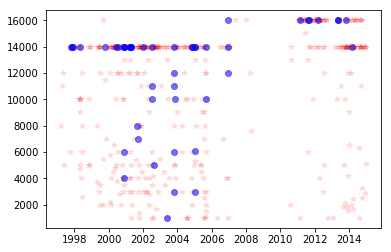

In [117]:
#import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline  

bold = df_NASA[:50]

plt.plot(df_NASA.start_datetime.values, df_NASA.start_frequency.values, '*', c='r', alpha=0.1, label="Whole Data")

plt.plot(bold.start_datetime.values, bold.start_frequency.values, 'o', c='b',  alpha=0.5, label="Top50 Data")
#plt.scatter(bold['start_datetime'], bold['start_frequency'], color='g', marker='s', alpha=.4)
#ax.scatter(x, y)
#ax.scatter(x[bold], y[bold], edgecolors='y', linewidths=5)

plt.show()

## 2. Here I want to see flares in the top 50 tend to have Halo CMEs or not. Here I calculate the proportion of halo in the whole data set and the top50 data set by averaging over the 'is_halo' column. I used bar plot to show this property on the top-50 and whole data. We see that top50 data tend to have more halo CMEs. The difference in this proportion is around 25%.

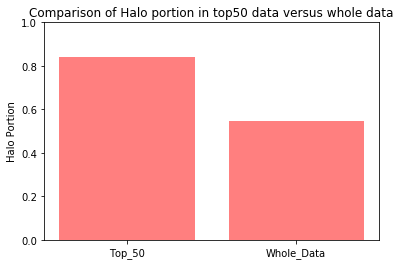

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline  

whole_data_halo_portion = np.average(df_NASA['is_halo'])
top_50_halo_portion=np.average(df_NASA['is_halo'][:50])

plt.bar([1,2],[top_50_halo_portion,whole_data_halo_portion], align='center',color='r',alpha=0.5)
bar_labels = ['Top_50', 'Whole_Data']
plt.xticks([1,2], bar_labels)
plt.ylabel('Halo Portion')
plt.title('Comparison of Halo portion in top50 data versus whole data')
plt.ylim(0,1)
plt.show()